In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

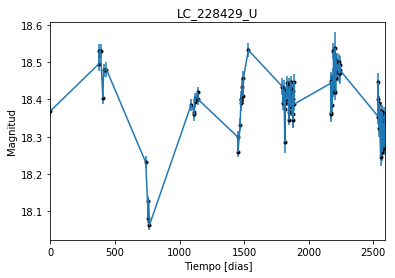

In [2]:
data = np.genfromtxt('LC_228429_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228429_U')
plt.savefig("LC_228429_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

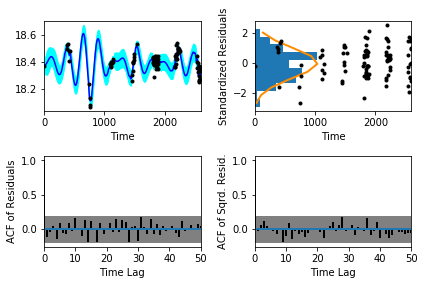

In [5]:
sample.assess_fit()

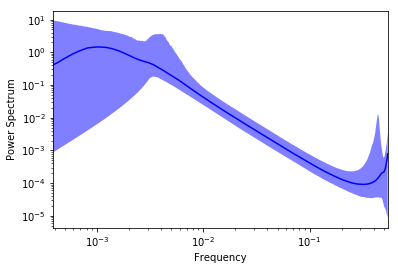

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

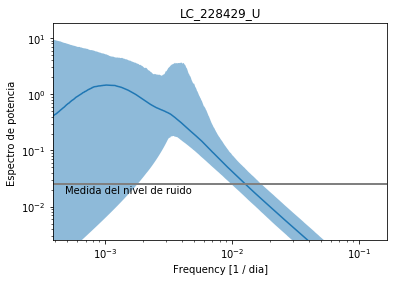

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228429_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228429_U')

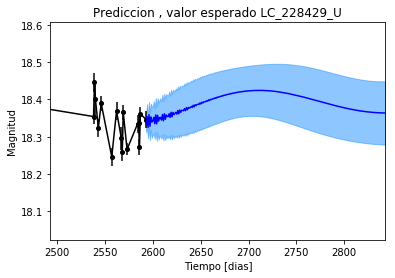

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228429_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228429_U')

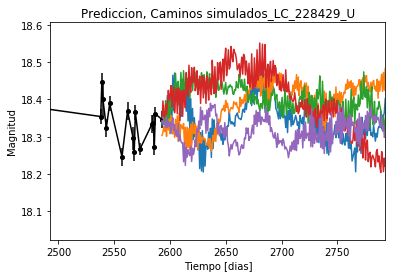

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228429_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


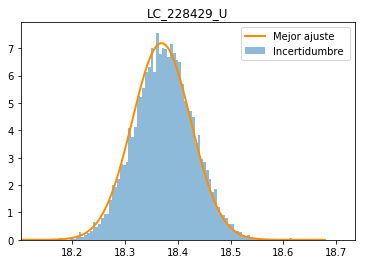

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228429_U')
plt.savefig("Mejor_ajuste_LC_228429_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228429_U')

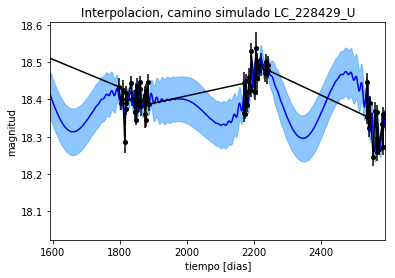

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_U')

Text(0.5,1,'Interpolacion, camino simulado LC_228429_U')

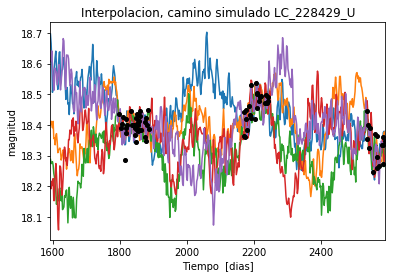

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 749.799454024
Median: 0.0111200537959
Standard deviation: 0.0281497475991
68% credibility interval: [ 0.0064314   0.01911068]
95% credibility interval: [ 0.00251821  0.03591112]
99% credibility interval: [ 0.00114617  0.08044073]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 644.431899313
Median: 0.0111162697782
Standard deviation: 0.024038871496
68% credibility interval: [ 0.00641873  0.01907727]
95% credibility interval: [ 0.00251313  0.03584193]
99% credibility interval: [ 0.00114617  0.07516034]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 122.841580654
Median: 0.000603256257069
Standard deviation: 0.253325159409
68%

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 406.913834831
Median: 230.115877161
Standard deviation: 2.62946301964
68% credibility interval: [ 227.299285    232.16011231]
95% credibility interval: [ 223.18000347  233.39099489]
99% credibility interval: [ 219.82437037  234.08008871]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 126.855864032
Median: 0.180045860259
Standard deviation: 1.59909517227
68% credibility interval: [ 0.11098504  2.11481679]
95% credibility interval: [ 0.07192494  5.91050827]
99% credibility interval: [ 0.05366713  6.73710359]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 150.179732059
Median: 12.3765293412
Standard deviation: 3.0634628727
68% credibility interval: [  7.50090495  12.93133606]
95% credibility interval: [  6.07914721  1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1211.87124676
Median: 6218920773.99
Standard deviation: 1.39847996848e+44
68% credibility interval: [  1.73971270e-33   3.31337340e+37]
95% credibility interval: [  4.10399985e-146   1.19972871e+041]
99% credibility interval: [  6.90626081e-150   8.14733559e+042]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2118.76033273
Median: 18.3875628042
Standard deviation: 0.0306336242155
68% credibility interval: [ 18.35839155  18.4131638 ]
95% credibility interval: [ 18.31911239  18.44069438]
99% credibility interval: [ 18.28095895  18.46948558]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 490.941118897
Median: 0.558853887627
Standard deviation: 0.0784249996549
68% credibility interval: [ 0.43388261  0.57023906]
95% credibility interval: [ 0.38942772  0.61675441]
99% credibility interval: [ 0.16602397  0.6794761 ]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 490.941118897
Median: 0.558853887627
Standard deviation: 0.0784249996549
68% credibility interval: [ 0.43388261  0.57023906]
95% credibility interval: [ 0.38942772  0.61675441]
99% credibility interval: [ 0.16602397  0.6794761 ]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 321.376009955
Median: 0.000945764874515
Standard deviation: 0.00162971

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 406.913834831
Median: 230.115877161
Standard deviation: 2.62946301964
68% credibility interval: [ 227.299285    232.16011231]
95% credibility interval: [ 223.18000347  233.39099489]
99% credibility interval: [ 219.82437037  234.08008871]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 418.792762187
Median: 0.0113917702392
Standard deviation: 0.00516708854625
68% credibility interval: [ 0.00820384  0.01634628]
95% credibility interval: [ 0.00620172  0.0253773 ]
99% credibility interval: [ 0.00531     0.03733252]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 435.924953789
Median: 1.06001499442
Standard deviation: 0.216277920622
68% credibility interval: [ 0.88321842  1.27424383]
95% credibility interval: [ 0.73899775  1.61874262]
99% credibility interval: [ 0.67672527  1.86688808]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 123.308014935
Median: 2.06244696528e-11
Standard deviation: 0.22767871136
68% credibility interval: [  5.18722063e-39   2.23340820e-01]
95% credibility interval: [  7.93428651e-43   8.31621817e-01]
99% credibility interval: [  1.01707354e-44   1.05912929e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 749.799454024
Median: (-0.0698693586255-2.77069342915j)
Standard deviation: 0.523540128191
68% credibility interval: [-0.12007591-3.95569646j -0.04040968-2.79962611j]
95% credibility interval: [-0.22563624-3.39752922j -0.01582237-3.50822445j]
99% credibility interval: [-0.50542403-2.08316077j -0.00720160-0.02648226j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 644.431899313
Median: (-0.0698455829412+2.57150960333j)
Standard deviation: 0.515387745997
68% credibility interval: [-0.11986603+3.81699156j -0.04033010+3.57866951j]
95% credibility interval: [-0.22520148+2.52387681j -0.01579047+3.50553182j]
99% credibility interval: [-0.47224633+3.21458894j -0.00720160+0.02648226j]
Posterior summary for parameter ar_roots  